In [1]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
import seaborn as sns

%matplotlib inline

In [2]:
counter = 21

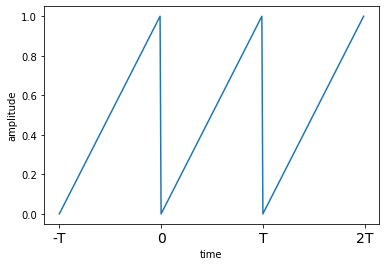

In [3]:
# plt.figure(figsize=(12,4))
zero = np.zeros(50)
ones = np.ones(50)

data = np.linspace(0, 1, 100)
data1 = np.hstack((data, data))
data1 = np.hstack((data1, data))
plt.xticks(np.arange(0, 350, 100), ["-T", "0", "T", "2T"], fontsize=14)  # πtex表記
plt.plot(data1)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.savefig("output/output_" + str(counter) + ".png", dpi=300)
counter += 1

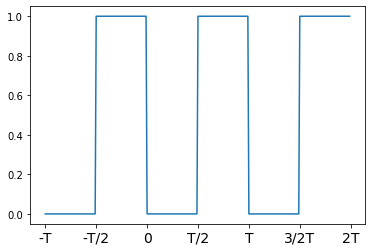

In [3]:
# plt.figure(figsize=(12,4))
zero = np.zeros(50)
ones = np.ones(50)

data = np.hstack((zero, ones))
data1 = np.hstack((data, data))
data1 = np.hstack((data1, data))
plt.xticks(
    np.arange(0, 350, 50), ["-T", "-T/2", "0", "T/2", "T", "3/2T", "2T"], fontsize=14
)  # πtex表記
plt.plot(data1)
plt.savefig("output/output_" + str(counter) + ".png", dpi=300)

# 矩形波の級数展開

$$
\sum_{k=1}^K \frac{2}{\pi k}\left\{1-(-1)^k\right\} \sin \left(2\pi \frac{k}{T}t \right)
$$

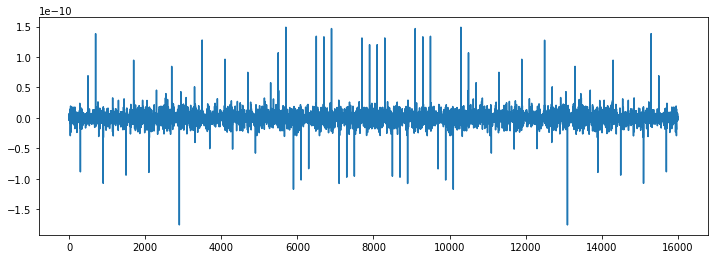

In [10]:
import numpy as np

# 振幅A 基本周波数f0 サンプリング周波数fs 長さ[秒]length
# 正弦波を合成する 矩形波
def createSquareWave(A, f0, fs, length):
    global counter
    data = []
    # [-1.0, 1.0]の小数値が入った波を作成
    for n in tqdm(np.arange(length * fs)):  # サンプルごとに10個のサイン波を重ね合わせ
        s = 0.0
        for k in range(1, 100):
            s += (
                2
                * A
                / (np.pi * k)
                * (1 - (-1) ** k)
                * np.sin(2 * np.pi * f0 * k * n / fs)
            )
        data.append(s)
#     plt.plot(data[0:400])
    plt.plot(np.fft.fft(data)[1:])
    # pyplot.show()
    plt.savefig("output/output_" + str(counter) + ".png", dpi=300)
    counter += 1


if __name__ == "__main__":
    plt.figure(figsize=(12, 4))
    f = 100
    data = createSquareWave(0.5, f, 16000.0, 1.0)

# のこぎり波の級数展開

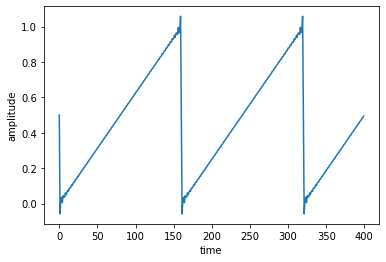

In [4]:
import numpy as np

# 振幅A 基本周波数f0 サンプリング周波数fs 長さ[秒]length
# 正弦波を合成する 矩形波
def createSquareWave(A, f0, fs, length):
    global counter
    data = []
    # [-1.0, 1.0]の小数値が入った波を作成
    for n in tqdm(np.arange(length * fs)):  # サンプルごとに10個のサイン波を重ね合わせ
        s = 0.0
        # 直流
        s = 0.5
        for k in range(1, 100):
            s += (-1) * 2 * A / (np.pi * k) * np.sin(2 * np.pi * f0 * k * n / fs)
        data.append(s)
    plt.plot(data[0:400])
    # pyplot.show()
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.savefig("output/output_" + str(counter) + ".png", dpi=300)
    counter += 1


if __name__ == "__main__":
    #     plt.figure(figsize=(12,4))
    f = 100
    data = createSquareWave(0.5, f, 16000.0, 1.0)

# 窓関数

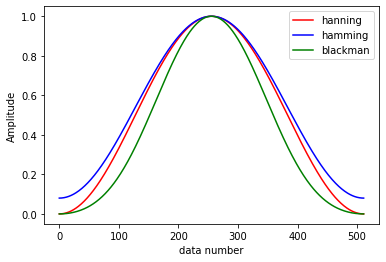

In [25]:
# https://org-technology.com/posts/window-function.html
from scipy import signal
import matplotlib.pyplot as plt

# 時系列のサンプルデータ作成
N = 512  # データ数

# 窓関数の一例
w1 = signal.hann(N)  # ハニング窓
w2 = signal.hamming(N)  # ハミング窓
w3 = signal.blackman(N)  # ブラックマン窓

# プロット
plt.figure()
plt.plot(w1, "r", w2, "b", w3, "g")
plt.axis("tight")
plt.ylabel("Amplitude")
plt.xlabel("data number")
plt.legend(["hanning", "hamming", "blackman"])

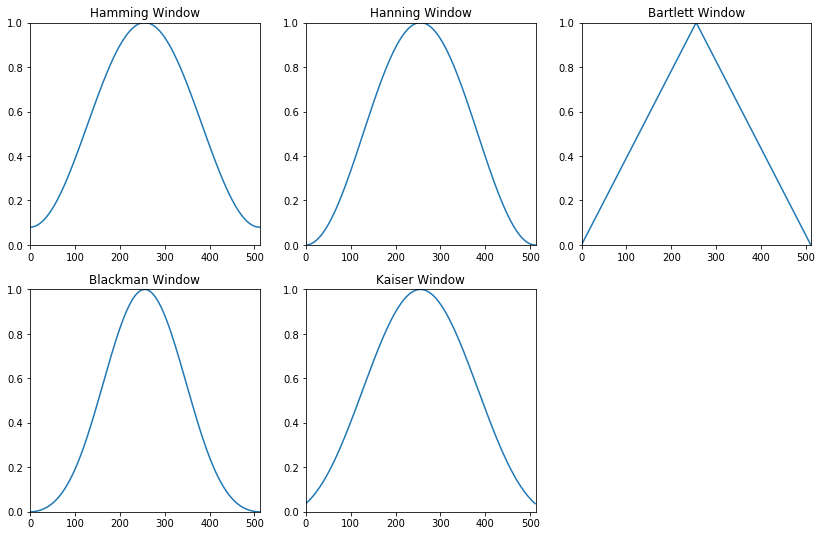

In [3]:
plt.figure(figsize=(14, 9))
N = 512

hammingWindow = np.hamming(N)
hanningWindow = np.hanning(N)
bartlettWindow = np.bartlett(N)
blackmanWindow = np.blackman(N)
kaiserWindow = np.kaiser(N, 5)

plt.subplot(231)
plt.plot(hammingWindow)
plt.title("Hamming Window")
plt.axis((0, N, 0, 1))

plt.subplot(232)
plt.plot(hanningWindow)
plt.title("Hanning Window")
plt.axis((0, N, 0, 1))

plt.subplot(233)
plt.plot(bartlettWindow)
plt.title("Bartlett Window")
plt.axis((0, N, 0, 1))

plt.subplot(234)
plt.plot(blackmanWindow)
plt.title("Blackman Window")
plt.axis((0, N, 0, 1))

plt.subplot(235)
plt.plot(kaiserWindow)
plt.title("Kaiser Window")
plt.axis((0, N, 0, 1))

plt.savefig("output/output_21.png", dpi=300)

# 正弦波のDFT

https://momonoki2017.blogspot.com/2018/03/pythonfft-1-fft.html

## 正弦波を描画

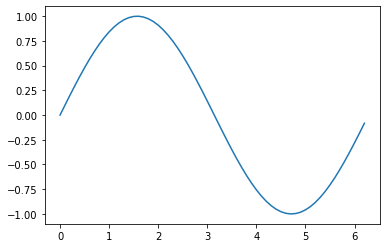

In [2]:
x = np.arange(0, 2 * np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y)

### 横軸を凝ってみる

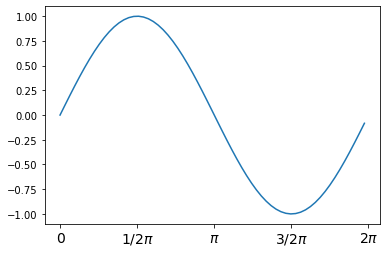

In [3]:
# グラフのx軸をπで表示
x = np.arange(0, 2 * np.pi, 0.1)
y = np.sin(x)
plt.xticks(
    np.arange(0, 2.1 * np.pi, 0.5 * np.pi),
    ["0", "1/2$\pi$", u"$\pi$", "3/2$\pi$", u"2$\pi$"],
    fontsize=14,
)  # πtex表記
plt.plot(x, y)

## データ数を指定して1周期の正弦波を描画

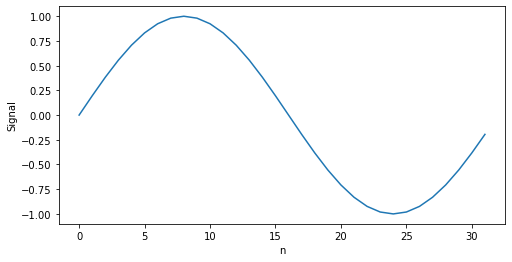

In [7]:
N = 32  # データ数
n = np.arange(N)
signal = np.sin(2 * np.pi * n / N)

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(signal)

### 更にfreqを用いて周波数を変化できるようにする

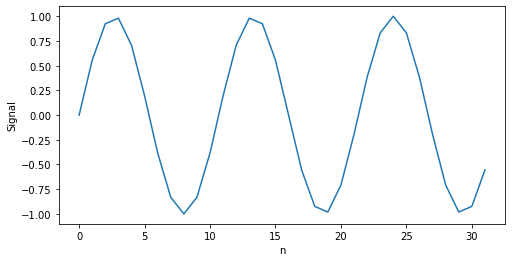

In [8]:
N = 32  # データ数
n = np.arange(N)
freq = 3  # 周期
f = np.sin(freq * 2 * np.pi * (n / N))  # freq=3周期分

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)

## FFTする

In [11]:
F = np.fft.fft(f)  # 高速フーリエ変換(FFT)

In [14]:
print(type(F), F.dtype)

<class 'numpy.ndarray'> complex128


FFTをすると、複素数のデータが得られる  
FFTの結果から、複素数を絶対値に変換して確認する  
ここでは、numpyのabs関数を用いる  

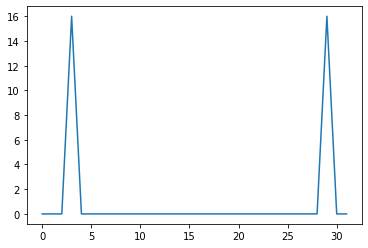

In [10]:
F_abs = np.abs(F)
plt.plot(F_abs)

In [17]:
print(F_abs[0:5])

[2.00860586e-16 2.29735034e-15 1.85887828e-15 1.60000000e+01
 2.86753903e-15]


周波数3の部分にピークが現れている  
信号は確かに周波数3の正弦波だったので合っている  
後半にも同様のピークが見られるが、これは、複素共役に関係して鏡像という形で出現するピークである  
また、サンプリング定理より周波数はデータ数の半分までである

### FFTの結果は半分まで描画する

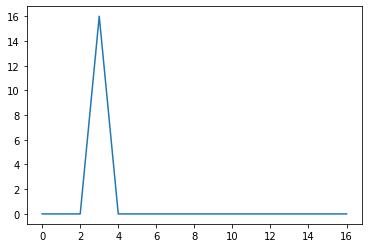

In [19]:
plt.plot(F_abs[: N // 2 + 1])

### 値の正規化

FFT 処理したデータの大きさを見てみると、元の信号の振幅と全く異っていることがわかります。  
FFT 処理したデータをちゃんと元の信号と対応させないといけません。  
ではどうするのかと言うと、  

**FFT 処理したデータに 1/N を掛け、交流成分については更に 2 倍してやります。**  

離散フーリエ逆変換の定義から、正規化係数 1/N を掛けることはすぐにわかります。  

交流成分について 2 倍するというのは、前回のエイリアシング現象の話しに関連します。  
ナイキスト周波数を中心とした対称な周波数の波の区別ができず、それぞれにピークが立っていたように、波の大きさが等分されているので、交流成分については 2 倍する必要があるのです(1 周期がデータ数 N/2 に対応しているからと言った方が正しいかもしれません)。  
https://org-technology.com/posts/fft-03.html

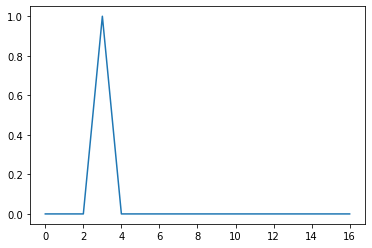

In [48]:
F_abs_amp = F_abs / N * 2  # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2  # 直流成分（今回は扱わないけど）は2倍不要
plt.plot(F_abs_amp[: N // 2 + 1])

振幅1,周波数3の正弦波が検出された、ということ

## 信号と周波数軸上のパワーの総和

https://jp.mathworks.com/matlabcentral/answers/92340-fft-length-x  
FFTでも、信号と周波数軸乗のパワーの総和は一致するらしい  
そうなるように正規化すると、こうなる

### 信号

In [23]:
P1 = sum(np.power(f, 2)) / len(f)
P1

0.5000000000000002

### 周波数

In [47]:
P2 = sum(np.power(F_abs / len(f), 2))
P2

0.5

## 振幅を変更してFFT

振幅を4にした場合、FFTの結果もピーク値が4になるはず。それを確認する

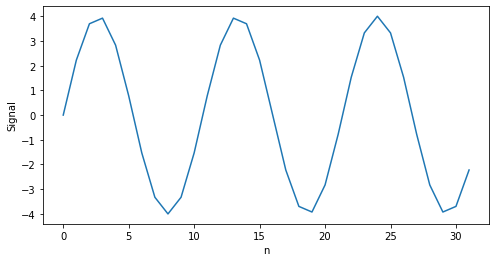

In [49]:
N = 32  # データ数
n = np.arange(N)
freq = 3  # 周期
amp = 4  # 振幅
f = amp * np.sin(freq * 2 * np.pi * (n / N))  # 周期freq=3、振幅amp=4

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)

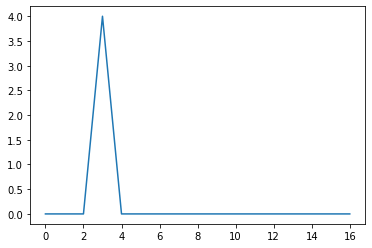

In [50]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
# FFT結果（複素数）を絶対値に変換
F_abs = np.abs(F)
# 振幅を元に信号に揃える
F_abs_amp = F_abs / N * 2  # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2  # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（データ数の半分の周期を表示）
plt.plot(F_abs_amp[: N // 2 + 1])

## 異なる２つの周波数を持つ正弦波を足し合わせる

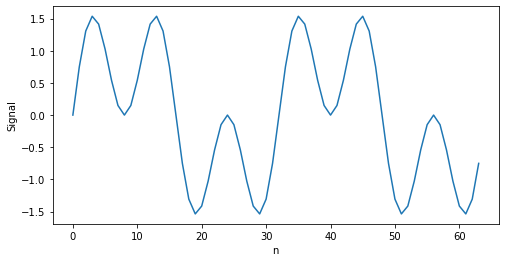

In [51]:
N = 64  # データ数
n = np.arange(N)
f1 = 2  # 周期
f2 = 6
f = np.sin(f1 * 2 * np.pi * (n / N)) + np.sin(f2 * 2 * np.pi * (n / N))

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)

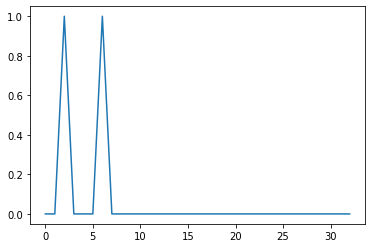

In [52]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
# FFT結果（複素数）を絶対値に変換
F_abs = np.abs(F)
# 振幅を元に信号に揃える
F_abs_amp = F_abs / N * 2  # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2  # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（データ数の半分の周期を表示）
plt.plot(F_abs_amp[: N // 2 + 1])

## 周波数と振幅を変える

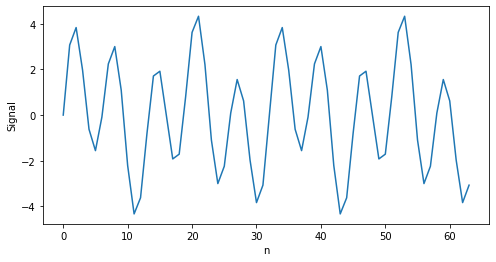

In [53]:
N = 64  # データ数
n = np.arange(N)
f1 = 4  # 周期①
f2 = 10  # 周期②
a1 = 1.5  # 振幅①
a2 = 3  # 振幅②
f = a1 * np.sin(f1 * 2 * np.pi * (n / N)) + a2 * np.sin(f2 * 2 * np.pi * (n / N))

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)

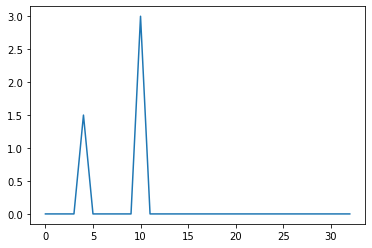

In [55]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
# FFT結果（複素数）を絶対値に変換
F_abs = np.abs(F)
# 振幅を元に信号に揃える
F_abs_amp = F_abs / N * 2  # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2  # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（データ数の半分の周期を表示）
plt.plot(F_abs_amp[: N // 2 + 1])

# 正弦波に窓関数をかけてDFT

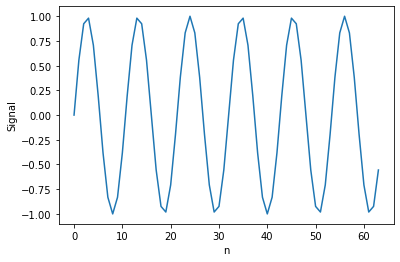

In [22]:
N = 64  # データ数
n = np.arange(N)
f1 = 6  # 周期
f = np.sin(f1 * 2 * np.pi * (n / N))

# グラフ表示
# plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)
plt.savefig("output/output_21.png", dpi=300)

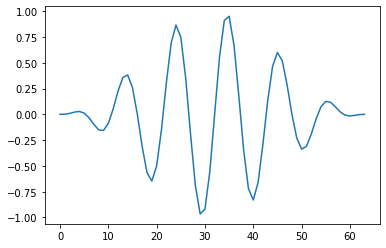

In [23]:
hanningWindow = np.hanning(N)
f_windowed = f * hanningWindow
plt.plot(f_windowed)
plt.savefig("output/output_21.png", dpi=300)

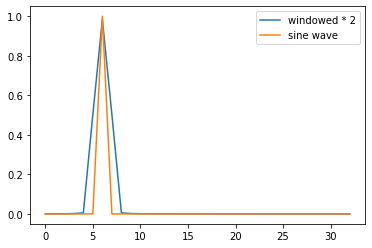

In [27]:
F = np.fft.fft(f_windowed)
F_abs = np.abs(F)

F_abs_amp = F_abs / N * 2
F_abs_amp[0] = F_abs_amp[0] / 2

# ハニング窓かけた後は補正　ハニング窓の場合は2をかける
# plt.plot(F_abs_amp[:N//2+1],label="windowed")
plt.plot(F_abs_amp[: N // 2 + 1] * 2, label="windowed * 2")


F = np.fft.fft(f)
F_abs = np.abs(F)

F_abs_amp = F_abs / N * 2
F_abs_amp[0] = F_abs_amp[0] / 2

# ハニング窓かけた後は補正　ハニング窓の場合は2をかける
plt.plot(F_abs_amp[: N // 2 + 1], label="sine wave")
plt.legend()
plt.savefig("output/output_21.png", dpi=300)

In [8]:
print("f:4", F_abs_amp[4] * 2)
print("f:5", F_abs_amp[5] * 2)
print("f:6", F_abs_amp[6] * 2)
print("f:7", F_abs_amp[7] * 2)
print("f:8", F_abs_amp[8] * 2)

f:4 0.005295338443372562
f:5 0.503840413950127
f:6 0.9842873413158952
f:7 0.5038082405650982
f:8 0.005361965672199818


本当は周波数6だけのはずが、他の部分も大きくなってしまう

# 不連続な正弦波をDFT

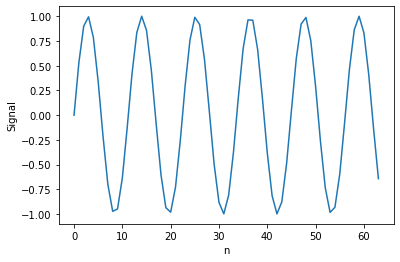

In [16]:
N = 64  # データ数
n = np.arange(N)
f1 = 5.7  # 周期
f = np.sin(f1 * 2 * np.pi * (n / N))

# グラフ表示
# plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)

plt.savefig("output/output_21.png", dpi=300)

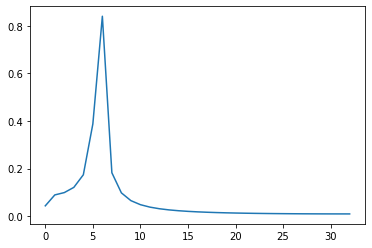

In [69]:
F = np.fft.fft(f)
F_abs = np.abs(F)
F_abs_amp = F_abs / N * 2
F_abs_amp[0] = F_abs_amp[0] / 2

plt.plot(F_abs_amp[: N // 2 + 1])

In [70]:
print("f:4", F_abs_amp[4])
print("f:5", F_abs_amp[5])
print("f:6", F_abs_amp[6])
print("f:7", F_abs_amp[7])
print("f:8", F_abs_amp[8])

f:4 0.17370749870363456
f:5 0.38762333678833444
f:6 0.8407165478184279
f:7 0.18215450607943623
f:8 0.09751759893112731


# 不連続な正弦波に窓関数をかけてDFT

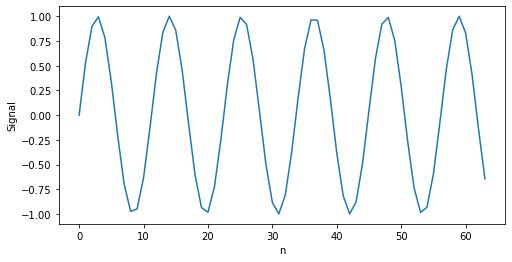

In [28]:
N = 64  # データ数
n = np.arange(N)
f1 = 5.7  # 周期
f = np.sin(f1 * 2 * np.pi * (n / N))

# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel("n")
plt.ylabel("Signal")
plt.plot(f)

plt.savefig("output/output_21.png", dpi=300)

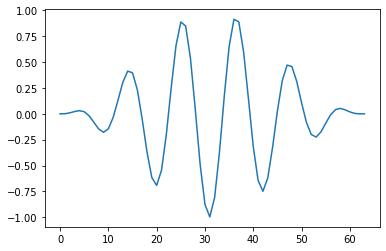

In [29]:
hanningWindow = np.hanning(N)
f_windowed = f * hanningWindow
plt.plot(f_windowed)

plt.savefig("output/output_21.png", dpi=300)

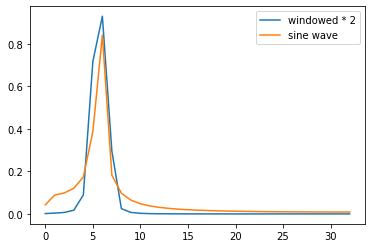

In [30]:
F = np.fft.fft(f_windowed)
F_abs = np.abs(F)

F_abs_amp = F_abs / N * 2
F_abs_amp[0] = F_abs_amp[0] / 2

plt.plot(F_abs_amp[: N // 2 + 1] * 2, label="windowed * 2")


F = np.fft.fft(f)
F_abs = np.abs(F)

F_abs_amp = F_abs / N * 2
F_abs_amp[0] = F_abs_amp[0] / 2

# ハニング窓かけた後は補正　ハニング窓の場合は2をかける
plt.plot(F_abs_amp[: N // 2 + 1], label="sine wave")
plt.legend()
plt.savefig("output/output_21.png", dpi=300)

In [13]:
print("f:4", F_abs_amp[4] * 2)
print("f:5", F_abs_amp[5] * 2)
print("f:6", F_abs_amp[6] * 2)
print("f:7", F_abs_amp[7] * 2)
print("f:8", F_abs_amp[8] * 2)

f:4 0.08921527084112131
f:5 0.7173373303524466
f:6 0.9303997844407447
f:7 0.29553268278718986
f:8 0.02464553693483031


ピークが小さくなるが、周辺の周波数の値が小さくなる